<a href="https://colab.research.google.com/github/Yousefsame7/slant_correction/blob/main/Copy_of_slant_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/my_image.jpeg')

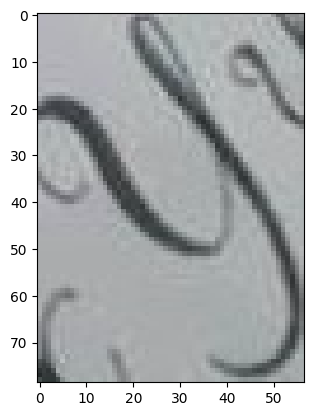

In [ ]:
plt.imshow(img)

In [ ]:
def slant_correction(img):
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

    _,thresh = cv2.threshold(gray , 0 , 255 , cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    contours , _ = cv2.findContours(thresh , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        angle = rect[-1]

        if angle < 280:
            angle = 270 + angle

        rows,cols = img.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D((cols/2 , rows/2), angle , 1)
        corrected_img = cv2.warpAffine(img , rotation_matrix , (cols , rows) , flags = cv2.INTER_CUBIC , borderMode = cv2.BORDER_REPLICATE)
    return corrected_img

In [ ]:
img_to_show  = slant_correction(img)

<ipython-input-17-af92ed9806bd>:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


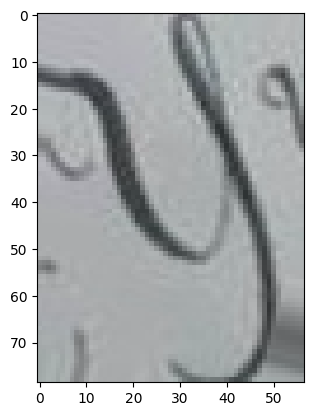

In [ ]:
plt.imshow(img_to_show)